## Data Info

In [1]:
# No: row number
# year: year of data in this row----------->(feature)
# month: month of data in this row--------->(feature)
# day: day of data in this row------------->(feature)
# hour: hour of data in this row----------->(feature)
# pm2.5: PM2.5 concentration (ug/m^3)------>(target)
# DEWP: Dew Point (â„ƒ)-------------------->(feature)
# TEMP: Temperature (â„ƒ)------------------>(feature)
# PRES: Pressure (hPa)--------------------->(feature)
# cbwd: Combined wind direction------------>(feature)
# Iws: Cumulated wind speed (m/s)---------->(feature)
# Is: Cumulated hours of snow-------------->(feature)
# Ir: Cumulated hours of rain-------------->(feature)

## Importing necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Reading data

In [3]:
df=pd.read_csv("PRSA_data_2010.1.1-2014.12.31.csv")

In [4]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [5]:
df.shape

(43824, 13)

## Checking for Null values

In [6]:
df.isnull().sum()

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [7]:
# There are total 2067 null values in "pm2.5" column
# Total shape is((43824, 13) so we can drop all these null value rows as it will not affect the performance model

In [8]:
df=df.dropna()

In [9]:
df.shape

(41757, 13)

## Checking for duplicate values

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
# There are no duplicate values

## Removal of unecessary rows

In [12]:
df.drop('No',axis=1,inplace=True)

## Statistical Information

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41757 entries, 24 to 43823
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    41757 non-null  int64  
 1   month   41757 non-null  int64  
 2   day     41757 non-null  int64  
 3   hour    41757 non-null  int64  
 4   pm2.5   41757 non-null  float64
 5   DEWP    41757 non-null  int64  
 6   TEMP    41757 non-null  float64
 7   PRES    41757 non-null  float64
 8   cbwd    41757 non-null  object 
 9   Iws     41757 non-null  float64
 10  Is      41757 non-null  int64  
 11  Ir      41757 non-null  int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 4.1+ MB


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,41757.0,2012.042771,1.415311,2010.00,2011.00,2012.00,2013.00,2014.00
month,41757.0,6.513758,3.454199,1.00,4.00,7.00,10.00,12.00
day,41757.0,15.685514,8.785539,1.00,8.00,16.00,23.00,31.00
hour,41757.0,11.502311,6.924848,0.00,5.00,12.00,18.00,23.00
pm2.5,41757.0,98.613215,92.050387,0.00,29.00,72.00,137.00,994.00
DEWP,41757.0,1.750174,14.433658,-40.00,-10.00,2.00,15.00,28.00
TEMP,41757.0,12.401561,12.175215,-19.00,2.00,14.00,23.00,42.00
PRES,41757.0,1016.442896,10.300733,991.00,1008.00,1016.00,1025.00,1046.00
Iws,41757.0,23.866747,49.617495,0.45,1.79,5.37,21.91,565.49
Is,41757.0,0.055344,0.778875,0.00,0.00,0.00,0.00,27.00


In [15]:
df.columns

Index(['year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'cbwd',
       'Iws', 'Is', 'Ir'],
      dtype='object')

## Scaling numerical values

In [16]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
col=['TEMP','PRES','Iws']
df[col]=sc.fit_transform(df[col])

In [17]:
df.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,2010,1,2,0,129.0,-16,0.245902,0.527273,SE,0.002372,0,0
25,2010,1,2,1,148.0,-15,0.245902,0.527273,SE,0.003947,0,0
26,2010,1,2,2,159.0,-11,0.229508,0.545455,SE,0.005522,0,0
27,2010,1,2,3,181.0,-7,0.229508,0.563636,SE,0.008690,1,0
28,2010,1,2,4,138.0,-7,0.229508,0.563636,SE,0.010265,2,0


## Tranforming categorical values

In [18]:
df['cbwd'].unique()

array(['SE', 'cv', 'NW', 'NE'], dtype=object)

In [19]:
# Here "cbwd" is categorical variable with values ['NW', 'cv', 'NE', 'SE']

In [20]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['cbwd']=lb.fit_transform(df['cbwd'])

In [21]:
print(df['cbwd'].unique())
lb.inverse_transform(df['cbwd'].unique())

[2 3 1 0]


array(['SE', 'cv', 'NW', 'NE'], dtype=object)

## Correlation matrix

In [22]:
cor_mat=df.corr()

In [23]:
cor_mat

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
year,1.000000,-0.002452,-0.000103,0.000200,-0.014690,0.007298,0.055656,-0.013466,0.040363,-0.068278,-0.019549,-0.026298
month,-0.002452,1.000000,0.006901,-0.000543,-0.024069,0.234492,0.172135,-0.066317,0.014426,0.014664,-0.062883,0.038874
day,-0.000103,0.006901,1.000000,0.000327,0.082788,0.033537,0.022871,-0.010497,0.017460,-0.004944,-0.037449,-0.000102
hour,0.000200,-0.000543,0.000327,1.000000,-0.023116,-0.021784,0.149443,-0.041831,0.085155,0.058865,-0.002455,-0.008741
pm2.5,-0.014690,-0.024069,0.082788,-0.023116,1.000000,0.171423,-0.090534,-0.047282,0.197150,-0.247784,0.019266,-0.051369
DEWP,0.007298,0.234492,0.033537,-0.021784,0.171423,1.000000,0.823821,-0.777722,0.232838,-0.293106,-0.034925,0.125341
TEMP,0.055656,0.172135,0.022871,0.149443,-0.090534,0.823821,1.000000,-0.826903,0.175498,-0.149613,-0.094785,0.049544
PRES,-0.013466,-0.066317,-0.010497,-0.041831,-0.047282,-0.777722,-0.826903,1.000000,-0.167989,0.178871,0.070537,-0.080532
cbwd,0.040363,0.014426,0.017460,0.085155,0.197150,0.232838,0.175498,-0.167989,1.000000,-0.200870,0.010613,-0.050037
Iws,-0.068278,0.014664,-0.004944,0.058865,-0.247784,-0.293106,-0.149613,0.178871,-0.200870,1.000000,0.022630,-0.009157


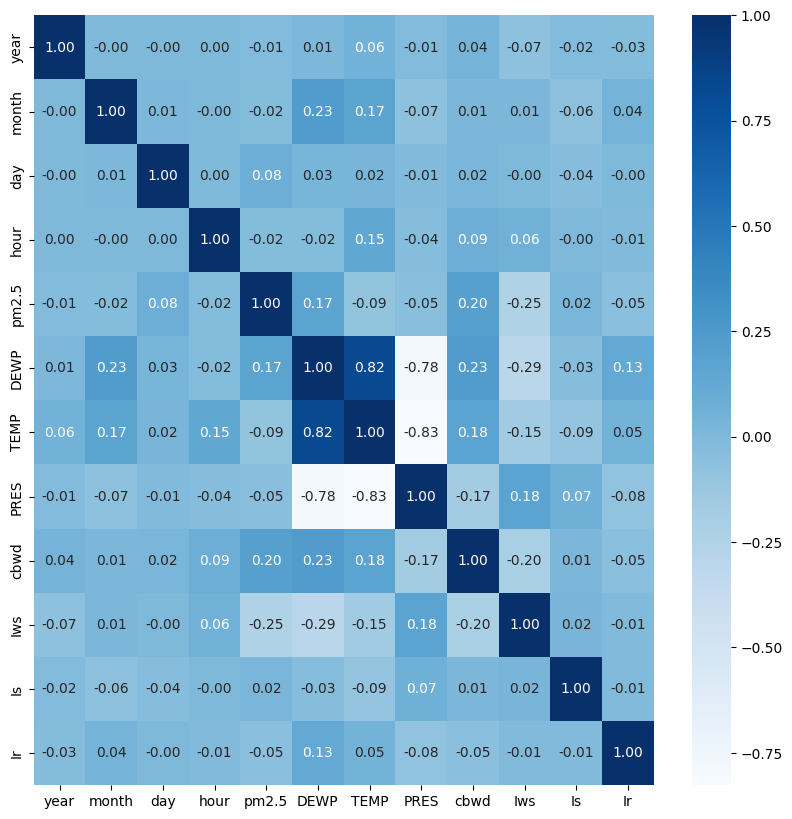

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(cor_mat,fmt='.2f',annot=True,cmap="Blues")
plt.show()

## EDA(VISUALIZATION)

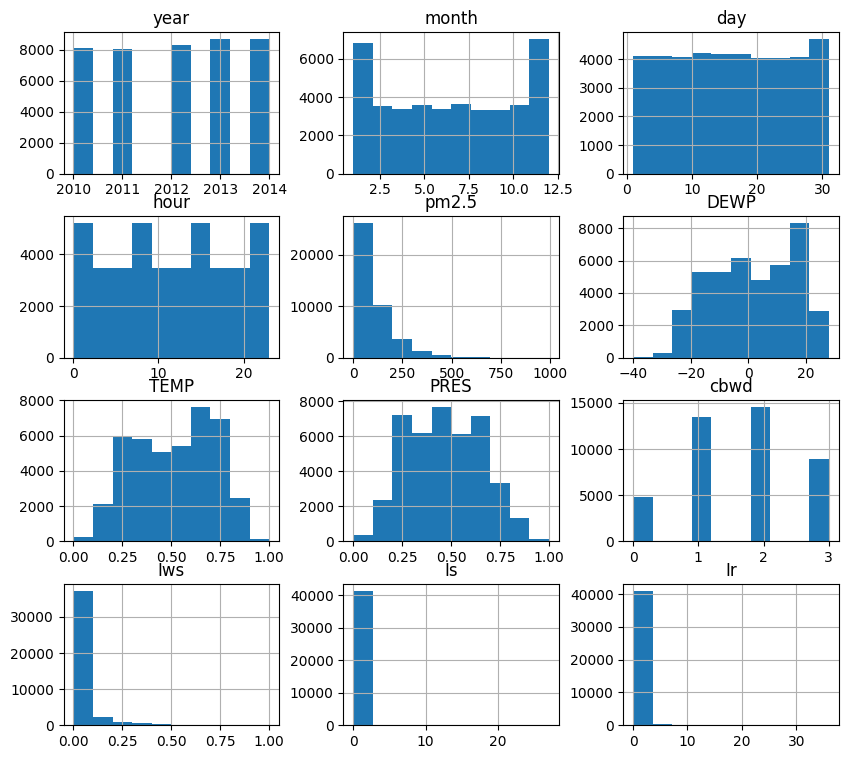

In [25]:
df.hist(figsize=(10,9))
plt.show()

In [26]:
import seaborn as sns

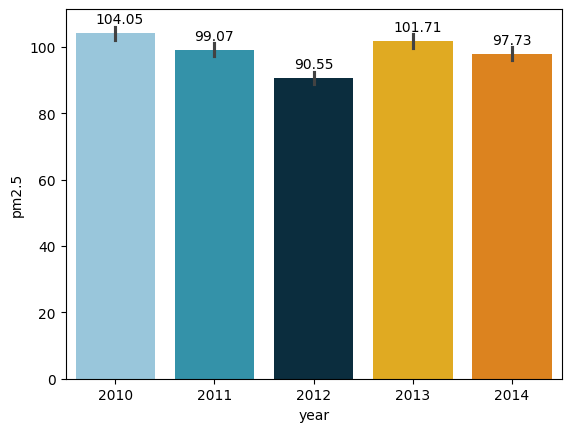

In [27]:
# Bar chart for year vs pm2.5 
sns.barplot(data=df,x='year',y='pm2.5',palette=['#8ecae6','#219ebc','#023047','#ffb703','#fb8500'])
values=df.groupby(['year']).mean().reset_index()['pm2.5']
for i in range(len(df['year'].unique())):
    plt.text(i-0.2,values[i]+3,round(values[i],2))

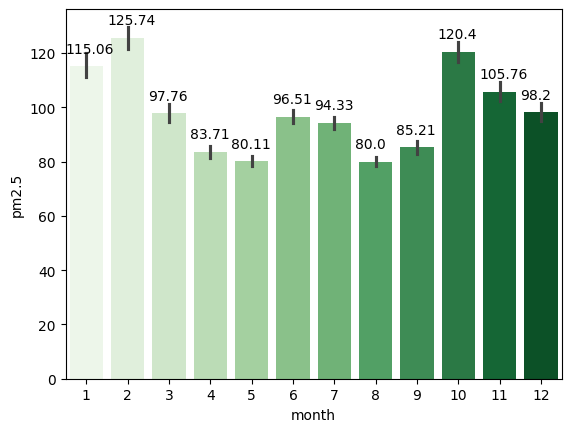

In [28]:
# Bar chart for month vs pm2.5 
sns.barplot(data=df,x='month',y='pm2.5',palette='Greens')
values=df.groupby(['month']).mean().reset_index()['pm2.5']
for i in range(len(df['month'].unique())):
    plt.text(i-0.5,values[i]+5,round(values[i],2))

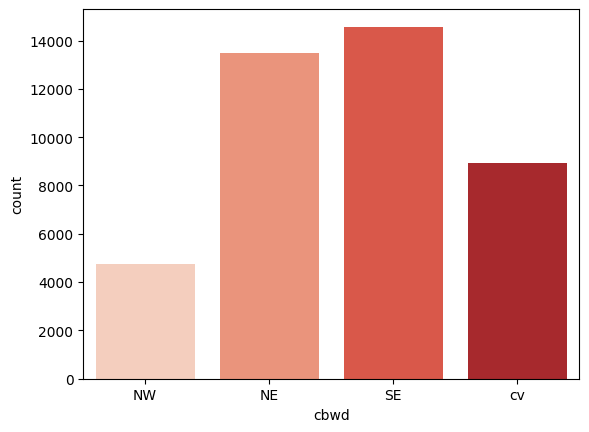

In [29]:
# Count plot for cbwd(combined wind direction)
sns.countplot(data=df,x='cbwd',palette='Reds')
plt.xticks([0,1,2,3],['NW', 'NE','SE', 'cv'])
plt.show()

Text(0, 0.5, 'Hours of Rain')

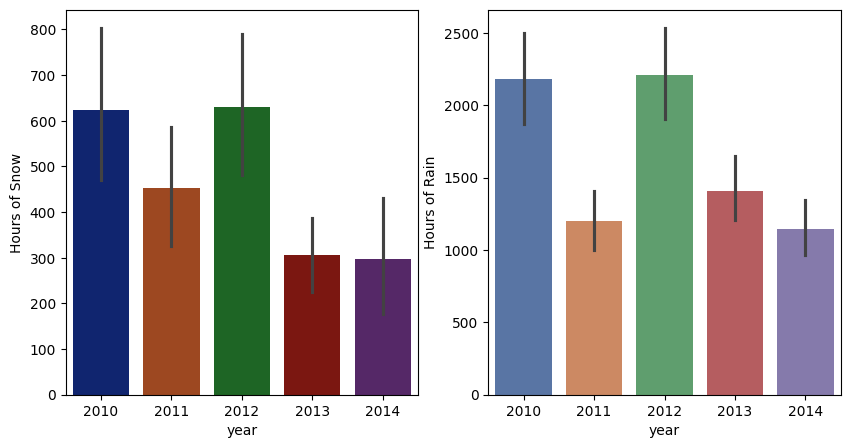

In [30]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(data=df,x='year',y='Is',estimator='sum',palette='dark')
plt.ylabel("Hours of Snow")
plt.subplot(1,2,2)
sns.barplot(data=df,x='year',y='Ir',estimator='sum',palette='deep')
plt.ylabel("Hours of Rain")

Text(0.5, 1.0, 'Month wise Temperature')

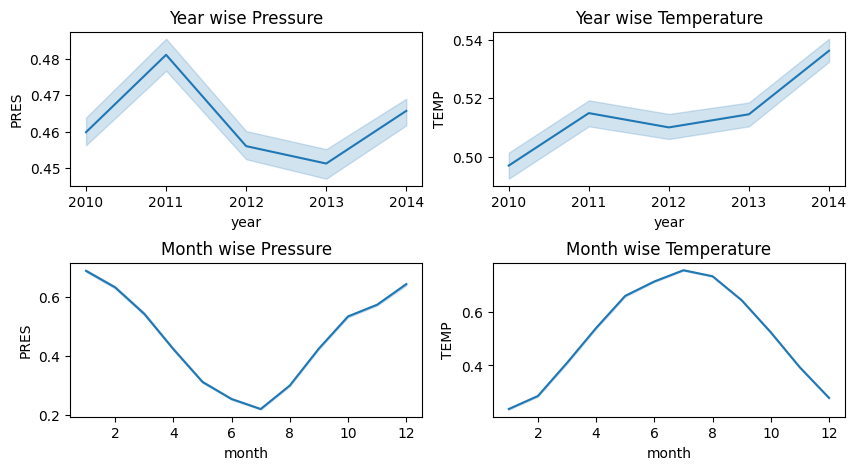

In [31]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(hspace=0.5)
plt.subplot(2,2,1)
sns.lineplot(data=df,x='year',y='PRES')
plt.title("Year wise Pressure")
plt.subplot(2,2,2)
sns.lineplot(data=df,x='year',y='TEMP')
plt.title("Year wise Temperature")
plt.subplot(2,2,3)
sns.lineplot(data=df,x='month',y='PRES')
plt.title("Month wise Pressure")
plt.subplot(2,2,4)
sns.lineplot(data=df,x='month',y='TEMP')
plt.title("Month wise Temperature")

## Data Splitting

In [32]:
X=df[['DEWP', 'TEMP', 'PRES', 'cbwd','Iws', 'Is', 'Ir']]
Y=df['pm2.5']

In [33]:
X

,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,-16,0.245902,0.527273,2,0.002372,0,0
25,-15,0.245902,0.527273,2,0.003947,0,0
26,-11,0.229508,0.545455,2,0.005522,0,0
27,-7,0.229508,0.563636,2,0.008690,1,0
28,-7,0.229508,0.563636,2,0.010265,2,0
...,...,...,...,...,...,...,...
43819,-23,0.278689,0.781818,1,0.409741,0,0
43820,-22,0.262295,0.781818,1,0.420023,0,0
43821,-22,0.262295,0.781818,1,0.428731,0,0
43822,-22,0.245902,0.781818,1,0.435845,0,0


In [34]:
Y

24       129.0
25       148.0
26       159.0
27       181.0
28       138.0
         ...  
43819      8.0
43820     10.0
43821     10.0
43822      8.0
43823     12.0
Name: pm2.5, Length: 41757, dtype: float64

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [36]:
x_train.shape,x_test.shape

((33405, 7), (8352, 7))

## Model Creation

In [37]:
# Models to implement
# Ridge Regressor
# Random Forest Regressor

## Ridge Regression

In [38]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error

In [39]:
ridge_model=Ridge()

In [40]:
ridge_model.fit(x_train,y_train)

Ridge()

In [41]:
y_train_pred=ridge_model.predict(x_train)
y_test_pred=ridge_model.predict(x_test)

In [43]:
ridge_train_mse=mean_squared_error(y_train,y_train_pred)
ridge_test_mse=mean_squared_error(y_test,y_test_pred)
print("Train error:",ridge_train_mse)
print("Test error:",ridge_test_mse)

Train error: 6271.582837810279
Test error: 6622.230189582674


In [44]:
cv_scores=cross_val_score(ridge_model,X,Y,cv=10,scoring='neg_mean_squared_error')

In [45]:
cv_mse_scores=-cv_scores
print("CV scores for all folds:",cv_mse_scores)

CV scores for all folds: [4809.17771119 8026.20978624 6119.70235582 8096.91987865 3876.33060284
 8051.04585611 6202.94763284 5151.58673811 8325.19221531 5722.67166741]


In [46]:
MAE=mean_absolute_error(y_test,y_test_pred)
MSE=mean_squared_error(y_test,y_test_pred)
RMSE=root_mean_squared_error(y_test,y_test_pred)
print(f'''Mean Absolute Error:{MAE}\n
Mean Squared Error:{MSE}\n
Root Mean Squared Error:{RMSE}''')

Mean Absolute Error:57.734527212946844

Mean Squared Error:6622.230189582674

Root Mean Squared Error:81.37708639158


## Random Forest Regressor

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [48]:
reg_model=RandomForestRegressor()

In [49]:
reg_model.fit(x_train,y_train)

RandomForestRegressor()

In [50]:
y_train_pred=reg_model.predict(x_train)
y_test_pred=reg_model.predict(x_test)

In [51]:
train_mse=mean_squared_error(y_train,y_train_pred)
test_mse=mean_squared_error(y_test,y_test_pred)
print("Train error:",train_mse)
print("Test error:",test_mse)

Train error: 785.4742976817399
Test error: 5244.561192008399


In [52]:
# model is overfotted as train_mse is less than test mse

In [53]:
cv_scores=cross_val_score(ridge_model,X,Y,cv=10,scoring='neg_mean_squared_error')
cv_mse_scores=-cv_scores
print("CV scores for all folds:",cv_mse_scores)

CV scores for all folds: [4809.17771119 8026.20978624 6119.70235582 8096.91987865 3876.33060284
 8051.04585611 6202.94763284 5151.58673811 8325.19221531 5722.67166741]


In [54]:
parameters1={'max_features':list(range(1,7)),'max_depth':list(range(1,10))}

In [55]:
reg_grid=GridSearchCV(reg_model,parameters1,cv=10,verbose=10,scoring="neg_mean_squared_error")

In [57]:
reg_grid.fit(x_train,y_train)

Fitting 10 folds for each of 54 candidates, totalling 540 fits
[CV 1/10; 1/54] START max_depth=1, max_features=1...............................
[CV 1/10; 1/54] END max_depth=1, max_features=1;, score=-7611.465 total time=   0.3s
[CV 2/10; 1/54] START max_depth=1, max_features=1...............................
[CV 2/10; 1/54] END max_depth=1, max_features=1;, score=-7621.299 total time=   0.3s
[CV 3/10; 1/54] START max_depth=1, max_features=1...............................
[CV 3/10; 1/54] END max_depth=1, max_features=1;, score=-7896.311 total time=   0.3s
[CV 4/10; 1/54] START max_depth=1, max_features=1...............................
[CV 4/10; 1/54] END max_depth=1, max_features=1;, score=-8205.556 total time=   0.3s
[CV 5/10; 1/54] START max_depth=1, max_features=1...............................
[CV 5/10; 1/54] END max_depth=1, max_features=1;, score=-7802.671 total time=   0.3s
[CV 6/10; 1/54] START max_depth=1, max_features=1...............................
[CV 6/10; 1/54] END max_de

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [1, 2, 3, 4, 5, 6]},
             scoring='neg_mean_squared_error', verbose=10)

In [58]:
print(reg_grid.best_params_)
print(reg_grid.best_score_)

{'max_depth': 9, 'max_features': 6}
-4913.573543605799


In [59]:
y_train_pred=reg_grid.predict(x_train)
y_test_pred=reg_grid.predict(x_test)

In [60]:
reg_train_mse=mean_squared_error(y_train,y_train_pred)
reg_test_mse=mean_squared_error(y_test,y_test_pred)
print("Train error:",reg_train_mse)
print("Test error:",reg_test_mse)

Train error: 4487.150733774636
Test error: 5308.831602483445


In [61]:
MAE=mean_absolute_error(y_test,y_test_pred)
MSE=mean_squared_error(y_test,y_test_pred)
RMSE=root_mean_squared_error(y_test,y_test_pred)
print(f'''Mean Absolute Error:{MAE}\n
Mean Squared Error:{MSE}\n
Root Mean Squared Error:{RMSE}''')

Mean Absolute Error:49.34049127903148

Mean Squared Error:5308.831602483445

Root Mean Squared Error:72.86172934046682


In [62]:
data=pd.DataFrame({'Training MSE':[ridge_train_mse,reg_train_mse],'Testing MSE':[ridge_test_mse,reg_test_mse]},
                  index=['Ridge Regression','Random Forest Regression'])
data

,Training MSE,Testing MSE
Ridge Regression,6271.582838,6622.230190
Random Forest Regression,4487.150734,5308.831602
